In [1]:
# reload library
%load_ext autoreload
%autoreload 2

# A list of tags/uses is defined in the docs

In [46]:
import numpy as np
from matplotlib import pyplot as plt
from moms_apriltag import TagGenerator3
from IPython.display import display, clear_output


from moms_apriltag import apriltags_v3
from moms_apriltag import tags 
import importlib

from ipywidgets import  widgets
# from opencv_camera import mosaic
import os
import cv2

Includes a list of possible tag formats

In [64]:

formatwidget = widgets.Dropdown(options = apriltags_v3, value="tagStandard41h12",description="AprilTag Standard")
formatMod = importlib.import_module("moms_apriltag.tags."+str(formatwidget.value))
numwidget = widgets.IntText(min=0, max=len(formatMod.codes),description="AprilTag Number")

format = formatwidget.value
tagnum = numwidget.value
outputdir = os.path.join("_images",format)
outputwidget = widgets.Label(value="Output: "+os.path.join(outputdir,str(tagnum)+".png"))
maxtagwidget  = widgets.Label(value="Max Tag Number: "+str(2115))
livewidget = widgets.Checkbox(description="Live Update", value=True)

out = widgets.Output(layout=widgets.Layout(width='200px',height='200px'))
def update():
    pass
n=10

def generate_click(b):

    format = formatwidget.value
    tagnum = numwidget.value

    tg = TagGenerator3(format)
    im = tg.generate(tagnum)
    
    outputdir = os.path.join("_images",format)
    outputwidget.value = "Output: "+os.path.join(outputdir,str(tagnum)+".png")
    maxtagwidget.value = "Max Tag Number: "+str(len(tg.codes))
    with out:
        clear_output()

        

        fig, ax = plt.subplots(figsize = (5,5))
        h = ax.imshow(im, cmap="gray")

        plt.title(f"AprilTag: {tagnum} | {format}")
        plt.axis("off");

        fig.canvas.flush_events()
        fig.canvas.draw()
        plt.show()

        
        # plt.imshow(im, cmap="gray");
        
def value_changed(change):
    if livewidget.value:
        generate_click(change)

def save(b):
    format = formatwidget.value
    tagnum = numwidget.value

    tg = TagGenerator3(format)
    im = tg.generate(tagnum)
    
    png = tg.toRGBA(im)
    outputdir = os.path.join("_images",format)
    if not os.path.exists(outputdir):
        os.mkdir(outputdir)
    outputfile = os.path.join(outputdir,str(tagnum)+".png")
    cv2.imwrite(outputfile, png)


generatebutton = widgets.Button(description="Generate Image")
savebutton = widgets.Button(description="Save Image")

generatebutton.on_click(generate_click)
formatwidget.observe(value_changed,names="value")
numwidget.observe(value_changed,names="value")
savebutton.on_click(save)

left = widgets.VBox([formatwidget,numwidget,livewidget])
right = widgets.VBox([outputwidget,maxtagwidget])

layout = widgets.Layout(grid_template_columns='1fr 1fr')
grid = widgets.GridBox([left,right,generatebutton,savebutton],layout = layout)

display(grid,out)

im = None


GridBox(children=(VBox(children=(Dropdown(description='AprilTag Standard', index=3, options=('tagCircle21h7', …

Output(layout=Layout(height='200px', width='200px'))

Generate and display a single AprilTag

Max tags: 2115


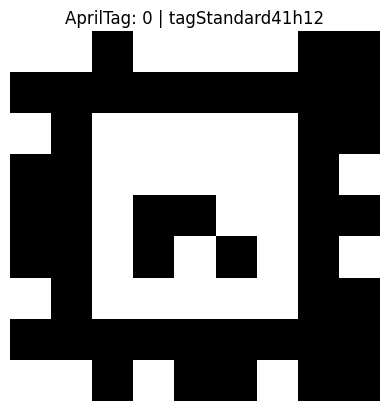

In [111]:
format = "tagStandard41h12"
tagnum = 0
tg = TagGenerator3(format)
im = tg.generate(tagnum)
print(f"Max tags: {len(tg.codes)}")
plt.imshow(im, cmap="gray");
plt.title(f"AprilTag: {tagnum} | {format}")
plt.axis("off");

Write the individual tag to a png file.

In [112]:
png = tg.toRGBA(im)
outputdir = os.path.join("_images",format)
if not os.path.exists(outputdir):
    os.mkdir(outputdir)
outputfile = os.path.join(outputdir,str(tagnum)+".png")
cv2.imwrite(outputfile, png)

True

Create and save many images

In [124]:
format = "tagStandard41h12"
tg = TagGenerator3(format)
outputdir = os.path.join("_images",format)
if not os.path.exists(outputdir):
    os.mkdir(outputdir)

taglist =range(2000,2115) 
for i in taglist:
    im = tg.generate(i)
    png = tg.toRGBA(im)
    outputfile = os.path.join(outputdir,str(i)+".png")
    cv2.imwrite(outputfile, png)

Combine generated images into a pdf file for printing

In [120]:
from PIL import Image, ImageDraw, ImageFont

dpi = 300
targetsize = 8
width = dpi*targetsize
targetfontheight = 0.25
fontheight = int(dpi*targetfontheight)

format = "tagStandard41h12"
fnt = ImageFont.truetype("arial.ttf",fontheight)

imagelist = range(0,100)

images = [Image.open(os.path.join("_images",format,f)).convert("L") for f in [str(n)+".png" for n in imagelist]]

images = [i.resize((width,width),resample=Image.NEAREST) for i in images]

for i in range(len(imagelist)):
    canvas = Image.new('L',(width,fontheight),color = (255))
    label = ImageDraw.Draw(canvas)
    label.text((width/2,fontheight/2),format + "   |   Tag " + str(imagelist[i]),fill=(0),anchor="mm",font=fnt)
    res = Image.new('L',(width,width+fontheight))
    res.paste(images[i], (0,0))
    res.paste(canvas,(0,width))
    images[i] = res


pdf_path = "output.pdf"

images[0].save(
    pdf_path, "PDF" ,resolution=dpi, save_all=True, append_images=images[1:]
)



0


Make a calibration page with a grid of april tags

In [163]:
from PIL import Image, ImageDraw, ImageFont


dpi = 300



margin = int(0.25 * dpi)
paperwidth=int(11   * dpi)
paperheight=int(8.5 * dpi)

rowcount = 5
colcount = 9

targetspacing = 0.25
spacing = int(targetspacing*dpi)

targetsize = 0.75
size = int(targetsize * dpi)

targetfontheight = 0.25
fontheight = int(dpi*targetfontheight)

format = "tagStandard41h12"
fnt = ImageFont.truetype("arial.ttf",fontheight)

imagelist = range(2000,2115)[0:rowcount*colcount]

images = [Image.open(os.path.join("_images",format,f)).convert("L") for f in [str(n)+".png" for n in imagelist]]

images = [i.resize((size,size),resample=Image.NEAREST) for i in images]

for i in range(len(imagelist)):
    canvas = Image.new('L',(size,fontheight),color = (255))
    label = ImageDraw.Draw(canvas)
    label.text((width/2,fontheight/2),str(imagelist[i]),fill=(0),anchor="mm",font=fnt)
    res = Image.new('L',(size,size+fontheight))
    res.paste(images[i], (0,0))
    res.paste(canvas,(0,size))
    images[i] = res


calibratepage = Image.new('L',(paperwidth,paperheight),color = (255))

canvas = Image.new('L',(paperwidth,fontheight),color = (255))
label = ImageDraw.Draw(canvas)
label.text((paperwidth/2,fontheight/2),"AprilTag " + format,fill=(0),anchor="mm",font=fnt)

topmargin = margin + int((paperheight - 2*margin - (rowcount * (size+fontheight+spacing)))/2)
leftmargin = margin + int((paperwidth - 2*margin - (colcount * (size+spacing)))/2)

calibratepage.paste(canvas,(margin,margin))

i = -1
# print(len(images), "images are available")
for row in range(rowcount):
    top = topmargin + row*(size+fontheight+spacing)
    for col in range(colcount):
        i += 1
        # print("Pasting image ", i, " to ", top, ",", left)
        left = leftmargin + col*(size+spacing)
        calibratepage.paste(images[i],(left,top))



pdf_path = "calibration.pdf"

calibratepage.save(
    pdf_path, "PDF" ,resolution=dpi)



337 300
